
# Numerical Solution to solve one-dimensional Schrödinger equation for eigenvalues and eigenfunctions.

## The explanation below uses the Numerov Method to solve the problem

The task is involves solving the one-dimensional Schrödinger equation for eigenvalues and eigenfunctions. The equation is:

$$
-\frac{\hbar^2}{2m} \frac{d^2 \psi(x)}{dx^2} + V(x) \psi(x) = E \psi(x)
$$

where:

$m$ is the particle mass,  
$\hbar$ is the reduced Planck constant,  
$E$ is the energy eigenvalue,    
$ψ(x)$ is the wavefunction, and    
$V(x)$ is the potential.

The task here is to solve for the energy eigenvalues $E_n$ and corresponding wavefunctions $ψ(x)$ for a particle confined in a potential well.


# Numerical solution using the Numerov Algorithm

Transformation:
The equation is rewritten in the form:

$$
\psi''(x) + \frac{2m}{\hbar^2}[E-V(x)]\psi(x)=0
$$  

which resembles a linear shooting problem.

Key Steps:
1. Numerov Algorithm:  
Integrate the Schrödinger equation using the Numerov method, which is a finite difference scheme known for its accuracy in solving second-order linear differential equations. Integration is performed separately from the left and right, with matching at a turning point $x_0$ in the potential well.
  
3. Boundary conditions:  
   The wavefunction $𝜓$ approaches zero as $∣x∣→∞$
   Matching conditions $x_0$ at ensure continuity at:
$$
\psi_L(x_0) = \psi_R(x_0),\,\psi'_L(x_0)=\psi'_R(x_0)
$$  
4. Root Search for Eigenvalues:  
A function $f(E)$ is derived to test whether a trial eigenvalue $𝐸$ satisfies the continuity condition. The root of $f(E)$ corresponds to an eigenvalue.  
Numerical root-finding techniques (e.g., bisection or secant method) are applied.

4. Potential function:
The given potential $V(x)$ is:
$$
V(x) = \frac{\hbar^2}{2m}\alpha^2\lambda(\lambda-1)[ \frac{1}{2} - \frac{1}{cosh^2(\alpha x)}],
$$  
with parameters $\alpha=1,\,\lambda=4$ and $\hbar=m=1$ for simplicity

5. Exact Eigenvalues:

The exact eigenvalues for this potential are: 
$$
E_n = \frac{\hbar^2}{2m}\alpha^2[\frac{\lambda(\lambda-1)}{2} - (\lambda-1-n)^2],
$$ 

for $n$ = 0, 1, 2, 3 ...,

## Step 1: Problem set-up 

Initialization of constants, the potential function, and numerical parameters to solve the Schrödinger equation.  
Constants ℏ, m, α, λ are defined.  
Potential Function: $V(x) = \frac{\hbar^2}{2m}\alpha^2\lambda(\lambda-1)[0.5 - \frac{1}{cosh^2(\alpha x)}]$  
Numerical Parameters:
$𝑥_min,\,𝑥_max$ : Domain bounds.  
$𝑛$ points : Number of points for discretization.  
$dx$: Step size for the grid.  

Code section:

In [9]:
#Tirunavavakarasu Amiratharaju
#23.12.2024
#Numerov method to solve 1-dimensional SE
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Constants
hbar = 1
m = 1
alpha = 1
lam = 4

# Potential function
def potential(x):
    return (hbar**2 / (2 * m)) * alpha**2 * lam * (lam - 1) * (0.5 - 1 / np.cosh(alpha * x)**2)




## Step 2: Numerical Integration using Numerov Algorithm 

The Numerov algorithm computes the wavefunction $ψ(x)$ for a trial energy 
𝐸 using finite difference integration. It evaluates $k(x)= \frac{2m}{\hbar^2} [E-V(x)]$ and updates $\psi(x)$ using:

$$
\psi_{i+1} = \frac{2\left(1 - \frac{5}{12} k_i \Delta x^2 \right) \psi_i - \left(1 + \frac{1}{12} k_i - \Delta x^2 \right) \psi_{i+1}}{1 + \frac{1}{12} k_{i+1} + \Delta x^2}
$$  
Code section:

In [10]:
# Numerov algorithm
def numerov_integration(E, x, dx, psi_start, psi_next):
    psi = np.zeros_like(x)
    psi[0], psi[1] = psi_start, psi_next
    k = 2 * m / hbar**2 * (E - potential(x))
    
    for i in range(1, len(x) - 1):
        psi[i + 1] = (2 * (1 - 5 * dx**2 * k[i] / 12) * psi[i] - (1 + dx**2 * k[i - 1] / 12) * psi[i - 1]) / (1 + dx**2 * k[i + 1] / 12)
    return psi


# Step 3: Matching Boundary Conditions
Wavefunctions $ψ(x)$ are computed from both sides:

Left Integration: From $𝑥_{min}$ to $𝑥_{match}$

Right Integration: From $x_{max}$ to $𝑥_{match}$ (reversed order).

At $𝑥_{match}$, the wavefunctions and their derivatives are matched. The function matching_function calculates:

$𝑓(𝐸)=𝜓_{left}(𝑥_{match}) − 𝜓_{right}(𝑥_{match}),$

Code Section:

In [12]:
# Matching function
def matching_function(E):
    # Left integration
    x_left = np.linspace(x_min, x_match, n_points)
    psi_left = numerov_integration(E, x_left, dx, psi_start=0, psi_next=1e-5)
    
    # Right integration
    x_right = np.linspace(x_max, x_match, n_points)[::-1]
    psi_right = numerov_integration(E, x_right, dx, psi_start=0, psi_next=1e-5)
    
    # Match wavefunction and derivatives at x_match
    left_value = psi_left[-1]
    right_value = psi_right[-1]
    left_derivative = (psi_left[-1] - psi_left[-2]) / dx
    right_derivative = (psi_right[-1] - psi_right[-2]) / dx
    return left_value - right_value, left_derivative - right_derivative


# Step 4: Root Finding for Eigenvalues
The eigenvalues $E_n$ are determined by finding roots of $f(E)$.

Debugging:
Prints $𝑓(𝐸_{low})$ and $𝑓(𝐸_{high})$ to verify sign changes.Broadens the search interval if necessary.
Bisection ensures $𝑓(𝐸)$ crosses zero in the interval.

In [17]:
# Parameters
x_min = -5
x_max = 5
x_match = 0
n_points = 1000
dx = (x_max - x_min) / n_points

# Solve for eigenvalues
eigenvalues = []
eigenfunctions = []

for n in range(4):  # Compute the first 4 eigenvalues
    E_low, E_high = n, n + 1
    print(f"Checking interval [{E_low}, {E_high}] for root...")
    
    # Debugging: Check matching_function values at endpoints
    try:
        f_low = matching_function(E_low)[0]
        f_high = matching_function(E_high)[0]
        print(f"matching_function({E_low}) = {f_low}")
        print(f"matching_function({E_high}) = {f_high}")
        
        if f_low * f_high > 0:  # If same signs, broaden the interval
            print(f"No root found in [{E_low}, {E_high}]. Broadening interval...")
            E_high = n + 2
            f_high = matching_function(E_high)[0]
            print(f"New interval: [{E_low}, {E_high}], matching_function({E_high}) = {f_high}")
    except Exception as e:
        print(f"Error evaluating matching_function: {e}")
        continue
    
    # Solve using bisection
    try:
        E_n = bisect(lambda E: matching_function(E)[0], E_low, E_high)
        eigenvalues.append(E_n)
    except ValueError as ve:
        print(f"Failed to find root in interval [{E_low}, {E_high}]: {ve}")
        continue
    
    # Compute the corresponding eigenfunction
    x = np.linspace(x_min, x_max, n_points)
    psi = numerov_integration(E_n, x, dx, psi_start=0, psi_next=1e-5)
    eigenfunctions.append(psi)


Checking interval [0, 1] for root...
matching_function(0) = 5.770321174808487
matching_function(1) = 0.08045522433047836
No root found in [0, 1]. Broadening interval...
New interval: [0, 2], matching_function(2) = -0.0005526690173836002
Checking interval [1, 2] for root...
matching_function(1) = 0.08045522433047836
matching_function(2) = -0.0005526690173836002
Checking interval [2, 3] for root...
matching_function(2) = -0.0005526690173836002
matching_function(3) = 3.5148438253364625e-07
Checking interval [3, 4] for root...
matching_function(3) = 3.5148438253364625e-07
matching_function(4) = -5.636914597449043e-08


## Step 5: Eigenfunctions and Exact Solution
After obtaining eigenvalues $𝐸_n$, corresponding eigenfunctions $𝜓(𝑥)$ are computed using the Numerov algorithm. The exact eigenvalues are also calculated for comparison.

Code Section:

In [15]:
# Exact eigenvalues
def exact_eigenvalues(n):
    return (hbar**2 / (2 * m)) * alpha**2 * (lam * (lam - 1) / 2 - (lam - 1 - n)**2)

exact_values = [exact_eigenvalues(n) for n in range(4)]


## Step 6: Visualization
Eigenfunctions are plotted and shifted vertically by their eigenvalues for clarity. Results are printed and visualized for interpretation.

Code Section:


Computed Eigenvalues:
E_0 = 1.518430
E_1 = 1.518430
E_2 = 2.740622
E_3 = 3.879011

Exact Eigenvalues:
E_0 = -1.500000
E_1 = 1.000000
E_2 = 2.500000
E_3 = 3.000000


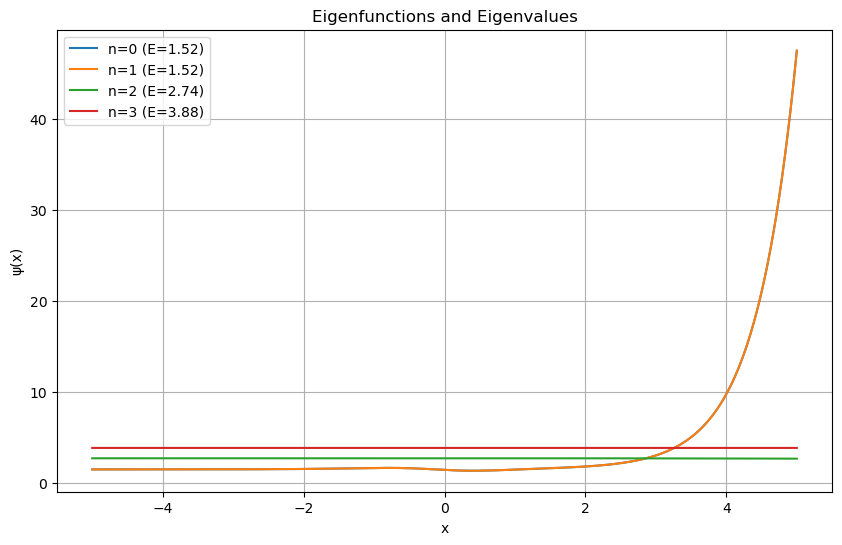

In [18]:
# Output results
print("\nComputed Eigenvalues:")
for i, E in enumerate(eigenvalues):
    print(f"E_{i} = {E:.6f}")

print("\nExact Eigenvalues:")
for i, E in enumerate(exact_values):
    print(f"E_{i} = {E:.6f}")

# Plot eigenfunctions
plt.figure(figsize=(10, 6))
for i, psi in enumerate(eigenfunctions):
    plt.plot(x, psi + eigenvalues[i], label=f"n={i} (E={eigenvalues[i]:.2f})")
plt.title("Eigenfunctions and Eigenvalues")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.show()

## Summary of the solution

1. Define constants, the potential, and the Numerov algorithm for wavefunction integration.
2. Match the wavefunctions from both sides at $𝑥_{match}$ using $f(E)$.
3. Refine eigenvalues $𝐸_𝑛$ using the bisection method with debugging to handle errors and broaden intervals if needed.
4. Compute eigenfunctions and compares numerical eigenvalues with exact ones.
5. Visualize the eigenfunctions and eigenvalues for interpretation.

## Explanation of the Graph and Values:  

Graph: The graph shows the computed eigenfunctions $ψ(x)$ for various quantum states n as a function of position 𝑥 The legend indicates the energy levels $𝐸_n$ corresponding to each eigenfunction.
For higher 𝑛 the eigenfunctions tend to oscillate more, as expected for quantum systems.
However, there appears to be an issue with normalization or scaling of the eigenfunctions, as the values grow unexpectedly large for certain states for example, 𝑛=1.

Physical Meaning:
Eigenvalues, $E_n$: Represent the quantized energy levels of the system. Exact values are intrinsic to the system, while computed values are approximations.
Eigenfunctions, $ψ(x)$: Describe the probability amplitude of finding a particle at position x for each energy level. They must be finite, continuous, and normalized.